# Data Breakdown and Visualization
## Imports

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## The Code

In [96]:
def main(mean_stats: bool=False, std_stats: bool=False, prob_stats: bool=False, show_bar_chart=True):
    # Loads text file
    file_name = 'Sales_01_20.csv'
    # Skips first row
    og_data = np.loadtxt(file_name, delimiter=',', skiprows=1)

    # Ensures that one and only one stat will be displayed
    assert sum([mean_stats, std_stats, prob_stats]) >= 1, "Please specify at least one statistic to showcase."
    
    if mean_stats:
        calc_mean_stats(og_data, show_bar_chart)
    elif std_stats:
        calc_std_stats(og_data, show_bar_chart)
    elif prob_stats:
        calc_prob_stats(og_data, show_bar_chart)
    else:
        pass


def calc_mean_stats(og_data, show_bar_chart: bool):
    mean_sale_stats: list[float] = []
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from that year, calculates the mean, std, and probability of a sale falling between $200K-300K
        mean_from_some_year: float = data_from_some_year[:, 1].mean()

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        mean_sale_stats.append(
            mean_from_some_year
        )

    # Creates a list of the years from 2001-2020 for the x-axis of the bar graph
    years: list[int] = [ year for year in range(2001, 2021) ]

    if show_bar_chart:
        '''Figure 1: Mean Prices'''
        fig, ax = plt.subplots()
        ax.bar(years, mean_sale_stats)
        ax.set_xlabel('Year')
        ax.set_ylabel('Price')
        ax.set_title('Mean Price of Residential Units by Year')
        plt.show()
    else:
        column_values = np.array([
            years,
            [ f"${mean_from_some_year:,.2f}" for mean_from_some_year in mean_sale_stats ]
        ]).T
    
        df = pd.DataFrame(column_values, columns=['Year', 'Mean Sales'])
        print(df)

    
def calc_std_stats(og_data, show_bar_chart: bool):
    std_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from that year, calculates the mean, std, and probability of a sale falling between $200K-300K
        std_from_some_year: float = data_from_some_year[:, 1].std()

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        std_sale_stats.append(
            std_from_some_year
        )

    # Creates a list of the years from 2001-2020 for the x-axis of the bar graph
    years: list[int] = [ year for year in range(2001, 2021) ]

    if show_bar_chart:
        '''Figure 2: Standard Deviations'''
        fig_2, ax_2 = plt.subplots()
        ax_2.bar(years, std_sale_stats)
        ax_2.set_xlabel('Year')
        ax_2.set_ylabel('Standard Deviation (in Millions)')
        ax_2.set_title('Standard Deviation of Residential Units by Year')
        plt.show()
    else:
        column_values = np.array([
            years,
            [ f"${std_from_some_year:,.2f}" for std_from_some_year in std_sale_stats ],
        ]).T
    
        df = pd.DataFrame(column_values, columns=['Year', 'Standard Deviation of Sales'])
        print(df)

    
def calc_prob_stats(og_data, show_bar_chart: bool):
    prob_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from that year, calculates the probability of a sale falling between $200K-300K
        data_in_range_from_some_year = data_from_some_year[(200_000 <= data_from_some_year[:, 1]) &
                                                        (data_from_some_year[:, 1] <= 300_000)]
        prob_from_some_year: float = len(data_in_range_from_some_year) / len(data_from_some_year)

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        prob_sale_stats.append(
            prob_from_some_year
        )

    # Creates a list of the years from 2001-2020 for the x-axis of the bar graph
    years: list[int] = [ year for year in range(2001, 2021) ]

    if show_bar_chart:
        '''Figure 3: Probabilities'''
        fig_3, ax_3 = plt.subplots()
        ax_3.bar(years, prob_sale_stats)
        ax_3.set_xlabel('Year')
        ax_3.set_ylabel('Probability of Price being Between 200k and 300k')
        ax_3.set_title('Probability of Price Ranging from 200K-300K for Residential Units by Year')
        plt.show()
    else:
        column_values = np.array([
            years,
            [ f"{prob_from_some_year:.2%}" for prob_from_some_year in prob_sale_stats ]
        ]).T
    
        df = pd.DataFrame(column_values, columns=['Year', 'Data Probability of Being Between $200K and $300K'])
        print(df)

# def calc_multiple_stats(*stats_to_calc):
#     for stats_to_calc:
#     for year in range(2001, 2021):
#     # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
#     data_from_some_year = og_data[og_data[:, 0] == year]
#     # Using the data from that year, calculates the mean, std, and probability of a sale falling between $200K-300K
#     mean_from_some_year: float = data_from_some_year[:, 1].mean()
#     std_from_some_year: float = data_from_some_year[:, 1].std()
#     data_in_range_from_some_year = data_from_some_year[(200_000 <= data_from_some_year[:, 1]) &
#                                                        (data_from_some_year[:, 1] <= 300_000)]
#     prob_from_some_year: float = len(data_in_range_from_some_year) / len(data_from_some_year)

#     # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
#     mean_sale_stats.append(mean_from_some_year)
#     std_sale_stats.append(std_from_some_year)
#     prob_sale_stats.append(prob_from_some_year)

#     # Creates a list of the years from 2001-2020 for the x-axis of the bar graph
#     years: list[int] = [ year for year in range(2001, 2021) ]
    
#     '''Figure 1: Mean Prices'''
#     fig, ax = plt.subplots()
#     ax.bar(years, mean_sale_stats)
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Price')
#     ax.set_title('Mean Price of Residential Units by Year')
#     plt.show()
    
#     '''Figure 2: Standard Deviations'''
#     fig_2, ax_2 = plt.subplots()
#     ax_2.bar(years, std_sale_stats)
#     ax_2.set_xlabel('Year')
#     ax_2.set_ylabel('Standard Deviation (in Millions)')
#     ax_2.set_title('Standard Deviation of Residential Units by Year')
#     plt.show()
    
#     '''Figure 3: Probabilities'''
#     fig_3, ax_3 = plt.subplots()
#     ax_3.bar(years, prob_sale_stats)
#     ax_3.set_xlabel('Year')
#     ax_3.set_ylabel('Probability of Price being Between 200k and 300k')
#     ax_3.set_title('Probability of Price Ranging from 200K-300K for Residential Units by Year')
#     plt.show()


## Mean

### Bar Chart

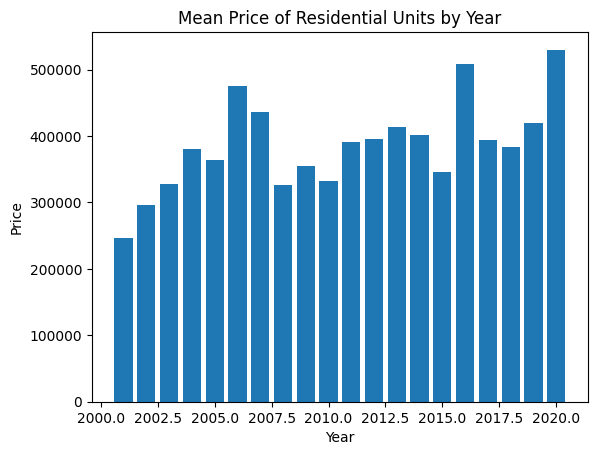

In [97]:
main(mean_stats=True, show_bar_chart=True)

### Table

In [98]:
main(mean_stats=True, show_bar_chart=False)

    Year   Mean Sales
0   2001  $246,235.04
1   2002  $296,357.12
2   2003  $327,217.93
3   2004  $380,297.01
4   2005  $364,030.13
5   2006  $475,379.23
6   2007  $435,713.38
7   2008  $325,831.79
8   2009  $355,250.33
9   2010  $331,657.47
10  2011  $391,684.32
11  2012  $395,477.68
12  2013  $413,516.24
13  2014  $401,421.94
14  2015  $345,883.76
15  2016  $507,761.25
16  2017  $393,251.31
17  2018  $383,727.66
18  2019  $420,296.97
19  2020  $529,887.73


## Standard Deviation
### Bar Chart

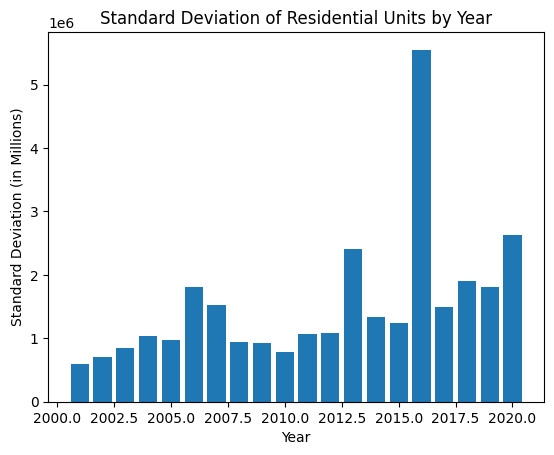

In [99]:
main(std_stats=True, show_bar_chart=True)

### Table

In [100]:
main(std_stats=True, show_bar_chart=False)

    Year Standard Deviation of Sales
0   2001                 $587,961.37
1   2002                 $711,353.42
2   2003                 $852,406.39
3   2004               $1,037,222.84
4   2005                 $978,403.13
5   2006               $1,803,537.63
6   2007               $1,520,524.36
7   2008                 $946,576.04
8   2009                 $919,126.62
9   2010                 $790,797.63
10  2011               $1,062,599.10
11  2012               $1,084,086.72
12  2013               $2,414,871.11
13  2014               $1,336,196.30
14  2015               $1,242,075.06
15  2016               $5,549,058.68
16  2017               $1,488,625.37
17  2018               $1,895,237.65
18  2019               $1,813,784.84
19  2020               $2,621,786.65


## Probability
### Bar Chart

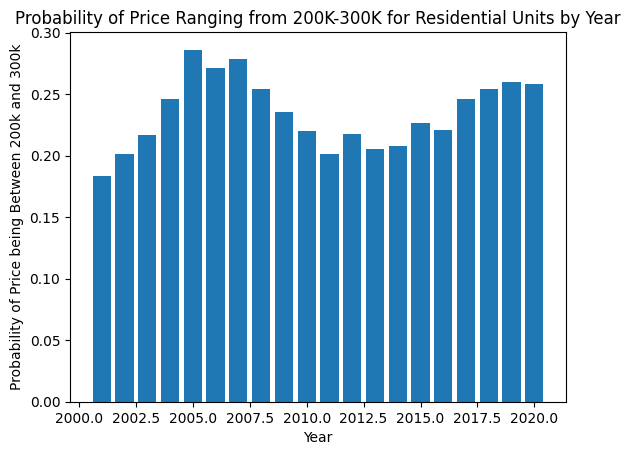

In [101]:
main(prob_stats=True, show_bar_chart=True)

### Table

In [102]:
main(prob_stats=True, show_bar_chart=False)

    Year Data Probability of being Between $200K and $300K
0   2001                                            18.31%
1   2002                                            20.17%
2   2003                                            21.64%
3   2004                                            24.61%
4   2005                                            28.60%
5   2006                                            27.10%
6   2007                                            27.86%
7   2008                                            25.38%
8   2009                                            23.52%
9   2010                                            22.02%
10  2011                                            20.14%
11  2012                                            21.77%
12  2013                                            20.54%
13  2014                                            20.74%
14  2015                                            22.66%
15  2016                                            22.1

## Summar